<a href="https://colab.research.google.com/github/Samarth-4403/railway-dashboard/blob/main/dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####  Loading the csv files, cleaning the data and understanding it

In [7]:
import pandas as pd

# Load the datasets
stations = pd.read_csv("indian_railway_stations.csv")
investment = pd.read_csv("private_investment.csv")
schedule = pd.read_csv("train_schedule.csv")

# Function to explore datasets
def explore_data(df, name):
    print(f"📌 Dataset: {name}")
    print("-" * 50)
    print("🔹 First 5 rows:")
    print(df.head(), "\n")
    print("🔹 Columns & Data Types:")
    print(df.dtypes, "\n")
    print("🔹 Missing Values:")
    print(df.isnull().sum(), "\n")
    print("🔹 Duplicates:", df.duplicated().sum(), "\n")
    print("=" * 50)

# Explore all datasets
explore_data(stations, "Indian Railway Stations")
explore_data(investment, "Private Investment")
explore_data(schedule, "Train Schedule")

# Standardize column names (lowercase & replace spaces)
def clean_column_names(df):
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    return df

stations = clean_column_names(stations)
investment = clean_column_names(investment)
schedule = clean_column_names(schedule)

# Handling missing values: Fill or drop
stations.fillna(method="ffill", inplace=True)  # Forward fill missing station data
schedule.dropna(inplace=True)  # Drop rows with missing schedule data
investment.fillna(0, inplace=True)  # Replace missing investment values with 0

# Remove duplicates
stations.drop_duplicates(inplace=True)
schedule.drop_duplicates(inplace=True)
investment.drop_duplicates(inplace=True)

# Display cleaned data overview
explore_data(stations, "Cleaned Indian Railway Stations")
explore_data(investment, "Cleaned Private Investment")
explore_data(schedule, "Cleaned Train Schedule")


<ipython-input-7-2ece865f70a0>:6: DtypeWarning: Columns (0,2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  schedule = pd.read_csv("train_schedule.csv")


📌 Dataset: Indian Railway Stations
--------------------------------------------------
🔹 First 5 rows:
   Unnamed: 0  CODE         STATION NAME RAILWAY ZONE  \
0           0    AA               ATARIA          NER   
1           1  AABH  AMBIKA BHAWANI HALT          ECR   
2           2  AADR           AMBANDAURA           NR   
3           3   AAG                ANGAR           CR   
4           4  AAGH             ANTAGARH         SECR   

                            STATION ADDRESS  
0  Sitapur Rd, Heerpur, Uttar Pradesh 261..  
1  Chapra-Patna Highway, Rampur Ami, Biha..  
2              Una, Himachal Pradesh, India  
3               Solapur, Maharashtra, India  
4  Antagarh, PIN - 494665, Dist. - Kanker..   

🔹 Columns & Data Types:
Unnamed: 0          int64
CODE               object
STATION NAME       object
RAILWAY ZONE       object
STATION ADDRESS    object
dtype: object 

🔹 Missing Values:
Unnamed: 0          0
CODE                0
STATION NAME        0
RAILWAY ZONE        0
S

<ipython-input-7-2ece865f70a0>:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stations.fillna(method="ffill", inplace=True)  # Forward fill missing station data


📌 Dataset: Cleaned Indian Railway Stations
--------------------------------------------------
🔹 First 5 rows:
   unnamed:_0  code         station_name railway_zone  \
0           0    AA               ATARIA          NER   
1           1  AABH  AMBIKA BHAWANI HALT          ECR   
2           2  AADR           AMBANDAURA           NR   
3           3   AAG                ANGAR           CR   
4           4  AAGH             ANTAGARH         SECR   

                            station_address  
0  Sitapur Rd, Heerpur, Uttar Pradesh 261..  
1  Chapra-Patna Highway, Rampur Ami, Biha..  
2              Una, Himachal Pradesh, India  
3               Solapur, Maharashtra, India  
4  Antagarh, PIN - 494665, Dist. - Kanker..   

🔹 Columns & Data Types:
unnamed:_0          int64
code               object
station_name       object
railway_zone       object
station_address    object
dtype: object 

🔹 Missing Values:
unnamed:_0         0
code               0
station_name       0
railway_zone      

#### Converting the data type and displaying cleaned data

In [8]:
# Standardizing column names
stations.columns = stations.columns.str.lower().str.replace(" ", "_")
investment.columns = investment.columns.str.lower().str.replace(" ", "_")
schedule.columns = schedule.columns.str.lower().str.replace(" ", "_")

# Convert train_no, seq, and distance to integer
schedule["train_no"] = pd.to_numeric(schedule["train_no"], errors="coerce").fillna(0).astype(int)
schedule["seq"] = pd.to_numeric(schedule["seq"], errors="coerce").fillna(0).astype(int)
schedule["distance"] = pd.to_numeric(schedule["distance"], errors="coerce").fillna(0).astype(int)

# Convert year to datetime format (extracting only the start year)
investment["year"] = investment["year"].str[:4].astype(int)

# Convert time columns to proper datetime format
schedule["arrival_time"] = pd.to_datetime(schedule["arrival_time"], format="%H:%M:%S", errors="coerce").dt.time
schedule["departure_time"] = pd.to_datetime(schedule["departure_time"], format="%H:%M:%S", errors="coerce").dt.time

# Fill missing station addresses using forward fill
stations["station_address"].fillna(method="ffill", inplace=True)

# Display data insights
print("📌 Unique Railway Zones:", stations["railway_zone"].nunique())
print("📌 Unique Train Numbers:", schedule["train_no"].nunique())
print("📌 Unique Stations:", stations["code"].nunique())

# Display cleaned datasets
print("\n🔹 Cleaned Train Schedule:")
print(schedule.head())

print("\n🔹 Cleaned Private Investment:")
print(investment.head())

print("\n🔹 Cleaned Railway Stations:")
print(stations.head())


📌 Unique Railway Zones: 18
📌 Unique Train Numbers: 11112
📌 Unique Stations: 8938

🔹 Cleaned Train Schedule:
   train_no    train_name  seq station_code  station_name arrival_time  \
0       107  SWV-MAO-VLNK    1          SWV  SAWANTWADI R     00:00:00   
1       107  SWV-MAO-VLNK    2         THVM        THIVIM     11:06:00   
2       107  SWV-MAO-VLNK    3         KRMI       KARMALI     11:28:00   
3       107  SWV-MAO-VLNK    4          MAO   MADGOAN JN.     12:10:00   
4       108  VLNK-MAO-SWV    1          MAO   MADGOAN JN.     00:00:00   

  departure_time  distance source_station source_station_name  \
0       10:25:00         0            SWV     SAWANTWADI ROAD   
1       11:08:00        32            SWV     SAWANTWADI ROAD   
2       11:30:00        49            SWV     SAWANTWADI ROAD   
3       00:00:00        78            SWV     SAWANTWADI ROAD   
4       20:30:00         0            MAO         MADGOAN JN.   

  destination_station destination_station_name  
0      

<ipython-input-8-60e502b54860>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stations["station_address"].fillna(method="ffill", inplace=True)
<ipython-input-8-60e502b54860>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stations["station_address"].fillna(method="ffill", inplace=True)


#### Exploring key insights and visualizing the data

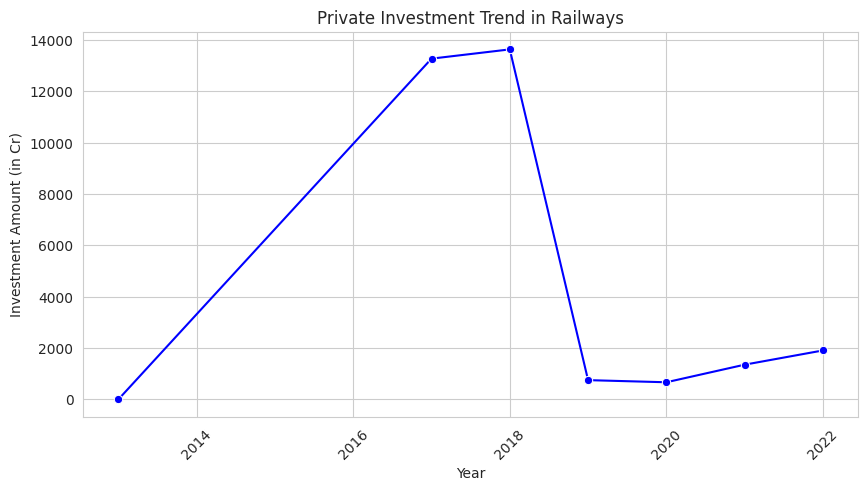

<ipython-input-3-99085d9f888c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_zones.index, y=top_zones.values, palette="viridis")


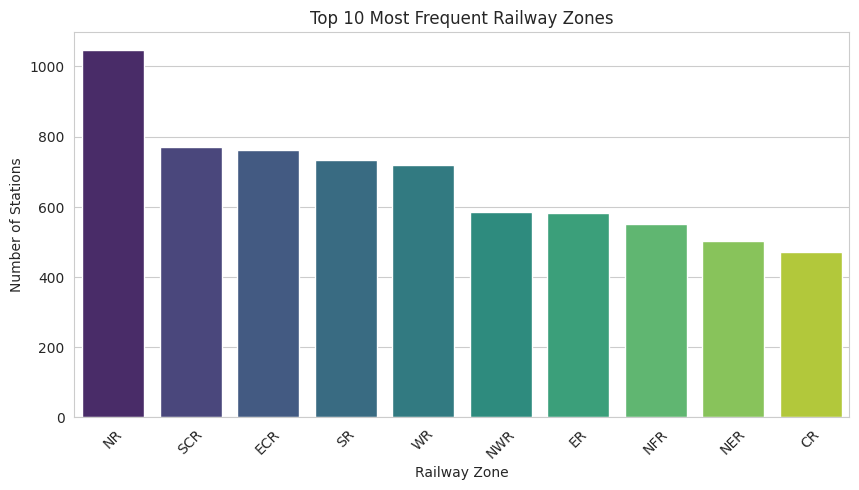

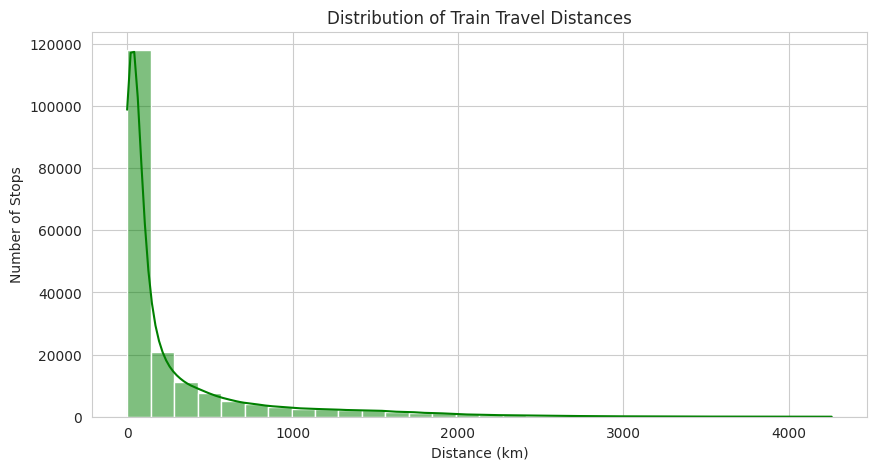

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set style
sns.set_style("whitegrid")

### 📌 1. Private Investment Trend Over the Years
plt.figure(figsize=(10, 5))
sns.lineplot(x="year", y="amount", data=investment, marker="o", color="b")
plt.xlabel("Year")
plt.ylabel("Investment Amount (in Cr)")
plt.title("Private Investment Trend in Railways")
plt.xticks(rotation=45)
plt.show()

### 📌 2. Top 10 Most Frequent Railway Zones
plt.figure(figsize=(10, 5))
top_zones = stations["railway_zone"].value_counts().head(10)
sns.barplot(x=top_zones.index, y=top_zones.values, palette="viridis")
plt.xlabel("Railway Zone")
plt.ylabel("Number of Stations")
plt.title("Top 10 Most Frequent Railway Zones")
plt.xticks(rotation=45)
plt.show()

### 📌 3. Train Distribution by Distance
plt.figure(figsize=(10, 5))
sns.histplot(schedule["distance"], bins=30, kde=True, color="g")
plt.xlabel("Distance (km)")
plt.ylabel("Number of Stops")
plt.title("Distribution of Train Travel Distances")
plt.show()


#### Visualisation

<ipython-input-4-5db6367d6a26>:6: DtypeWarning: Columns (0,2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  schedule = pd.read_csv("train_schedule.csv")


🚆 Longest Route: Train 15905 - 4260.0 km
🚆 Shortest Route: Train 79485 - 1.0 km


<ipython-input-4-5db6367d6a26>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_longest_routes["Train No"], x=top_longest_routes["Distance"], palette="Blues_r")


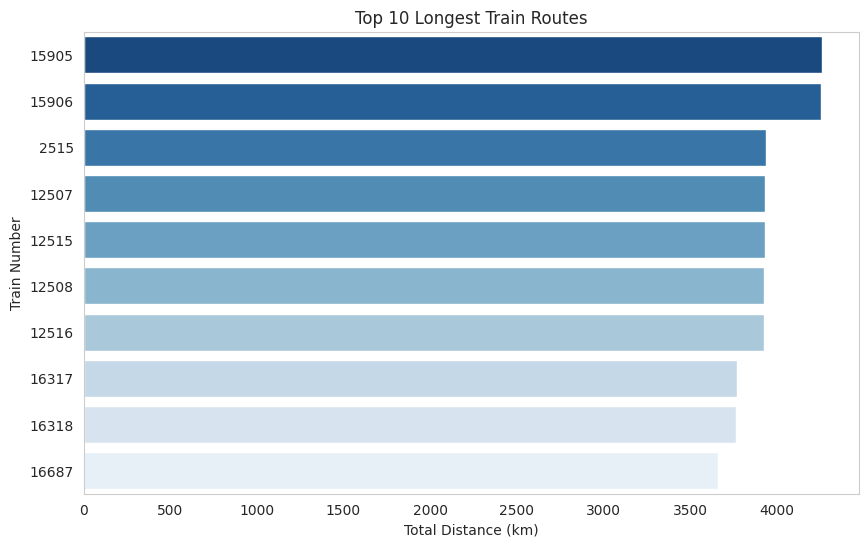

<ipython-input-4-5db6367d6a26>:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  schedule["Arrival Hour"] = pd.to_datetime(schedule["Arrival time"], errors="coerce").dt.hour
<ipython-input-4-5db6367d6a26>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_distribution.index, y=time_distribution.values, palette="coolwarm")


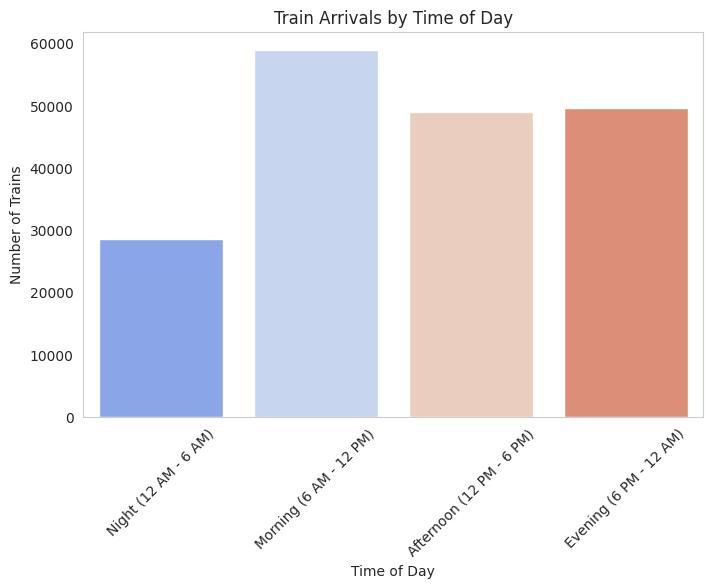

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV files (assuming they are in the same directory as the notebook)
schedule = pd.read_csv("train_schedule.csv")

# Convert distance to numeric for calculations
schedule["Distance"] = pd.to_numeric(schedule["Distance"], errors="coerce")

### ⏳ Travel Distance Analysis ###
# Find longest and shortest routes
train_distances = schedule.groupby("Train No")["Distance"].max().reset_index()
longest_train = train_distances.loc[train_distances["Distance"].idxmax()]
shortest_train = train_distances.loc[train_distances["Distance"].idxmin()]

print(f"🚆 Longest Route: Train {longest_train['Train No']} - {longest_train['Distance']} km")
print(f"🚆 Shortest Route: Train {shortest_train['Train No']} - {shortest_train['Distance']} km")

# Plot top 10 longest routes
top_longest_routes = train_distances.nlargest(10, "Distance")

plt.figure(figsize=(10, 6))
sns.barplot(y=top_longest_routes["Train No"], x=top_longest_routes["Distance"], palette="Blues_r")
plt.xlabel("Total Distance (km)")
plt.ylabel("Train Number")
plt.title("Top 10 Longest Train Routes")
plt.grid(axis="x")
plt.show()

### 📅 Daily Train Schedule Distribution ###
# Convert arrival time to hour-based bins
schedule["Arrival Hour"] = pd.to_datetime(schedule["Arrival time"], errors="coerce").dt.hour

# Define time categories
time_bins = [0, 6, 12, 18, 24]
time_labels = ["Night (12 AM - 6 AM)", "Morning (6 AM - 12 PM)", "Afternoon (12 PM - 6 PM)", "Evening (6 PM - 12 AM)"]
schedule["Time of Day"] = pd.cut(schedule["Arrival Hour"], bins=time_bins, labels=time_labels, right=False)

# Count number of trains arriving in each category
time_distribution = schedule["Time of Day"].value_counts().sort_index()

# Plot time distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=time_distribution.index, y=time_distribution.values, palette="coolwarm")
plt.xlabel("Time of Day")
plt.ylabel("Number of Trains")
plt.title("Train Arrivals by Time of Day")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


#### Dashboard

In [21]:
!pip install dash
import dash
from dash import dcc, html, dash_table
import pandas as pd
import plotly.express as px

# Load CSV files
stations = pd.read_csv("indian_railway_stations.csv")
investment = pd.read_csv("private_investment.csv")
schedule = pd.read_csv("train_schedule.csv")

# Fix column names
stations.columns = stations.columns.str.lower().str.replace(" ", "_")
investment.columns = investment.columns.str.lower().str.replace(" ", "_")
schedule.columns = schedule.columns.str.lower().str.replace(" ", "_")

# Fix missing values
stations["station_address"].fillna(method="ffill", inplace=True)
investment.fillna(0, inplace=True)

# Convert train_no and distance to numeric safely
schedule["train_no"] = pd.to_numeric(schedule["train_no"], errors="coerce")
schedule["distance"] = pd.to_numeric(schedule["distance"], errors="coerce")

# Drop NaN values before converting to int
schedule.dropna(subset=["train_no", "distance"], inplace=True)
schedule["train_no"] = schedule["train_no"].astype(int)
schedule["distance"] = schedule["distance"].astype(int)

# Ensure investment graph uses correct column name
investment["year"] = investment["year"].astype(str).str[:4].astype(int)

# Convert arrival_time properly
schedule["arrival_time"] = pd.to_datetime(schedule["arrival_time"], errors="coerce")

# Ensure arrival_time is valid before extracting hour
schedule.dropna(subset=["arrival_time"], inplace=True)
schedule["arrival_hour"] = schedule["arrival_time"].dt.hour

# Train travel distance analysis
train_distances = schedule.groupby("train_no", as_index=False)["distance"].max()

# Debugging: Check train_distances before filtering
print("Train Distances (Before Filtering):")
print(train_distances.head(10))

# Remove invalid distances (zero or NaN)
train_distances = train_distances[train_distances["distance"] > 0].dropna()

# Debugging: Check after filtering
print("Train Distances (After Filtering):")
print(train_distances.head(10))

# Get top 10 longest train routes
if not train_distances.empty:
    top_longest_routes = train_distances.nlargest(10, "distance")
else:
    top_longest_routes = pd.DataFrame(columns=["train_no", "distance"])

# Debugging: Check top longest routes
print("Top Longest Routes:")
print(top_longest_routes)

# Ensure the longest routes graph isn't empty
if top_longest_routes.empty:
    fig_longest_routes = px.bar(title="No Data Available for Longest Routes")
else:
    fig_longest_routes = px.bar(top_longest_routes, x="train_no", y="distance",
                                title="Longest Train Routes",
                                labels={"train_no": "Train Number", "distance": "Distance (km)"})

# Train arrival time distribution
time_bins = [0, 6, 12, 18, 24]
time_labels = ["Night (12 AM - 6 AM)", "Morning (6 AM - 12 PM)", "Afternoon (12 PM - 6 PM)", "Evening (6 PM - 12 AM)"]

# Ensure valid hour values
schedule.dropna(subset=["arrival_hour"], inplace=True)
schedule["time_of_day"] = pd.cut(schedule["arrival_hour"], bins=time_bins, labels=time_labels, right=False)
time_distribution = schedule["time_of_day"].value_counts().sort_index()

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Indian Railways Dashboard"

app.layout = html.Div([
    html.H1("🚆 Indian Railways Dashboard", style={'textAlign': 'center'}),

    # Private Investment Trend
    html.H3("📈 Private Investment Trends"),
    dcc.Graph(figure=px.line(investment, x="year", y="amount", title="Private Investment Over the Years")),

    # Train Travel Distance Distribution
    html.H3("📊 Train Travel Distance Distribution"),
    dcc.Graph(figure=px.histogram(schedule, x="distance", nbins=30, title="Distribution of Train Travel Distances")),

    # Train Arrivals by Time of Day
    html.H3("⏰ Train Arrivals by Time of Day"),
    dcc.Graph(figure=px.bar(x=time_distribution.index, y=time_distribution.values,
                            title="Train Arrivals During Different Time Slots",
                            labels={"x": "Time of Day", "y": "Number of Trains"})),

    # Railway Stations Table
    html.H3("📍 Railway Stations Data"),
    dash_table.DataTable(
        columns=[{"name": i, "id": i} for i in stations.columns],
        data=stations.to_dict("records"),
        page_size=10,
        style_table={'overflowX': 'auto'}
    )
])

if __name__ == "__main__":
    app.run_server(debug=True)


<ipython-input-21-02f1d3c926b8>:10: DtypeWarning:

Columns (0,2,7) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-21-02f1d3c926b8>:18: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-21-02f1d3c926b8>:18: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

<ipython-input-21-02f1d3c926b8>:34: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `d

Train Distances (Before Filtering):
   train_no  distance
0       107        78
1       108        83
2       128       978
3       290      2694
4       401      1618
5       421      1276
6       422      1277
7       477      2616
8       502      1206
9       504      1313
Train Distances (After Filtering):
   train_no  distance
0       107        78
1       108        83
2       128       978
3       290      2694
4       401      1618
5       421      1276
6       422      1277
7       477      2616
8       502      1206
9       504      1313
Top Longest Routes:
      train_no  distance
1934     15905      4260
1935     15906      4256
36        2515      3939
899      12507      3932
907      12515      3932
900      12508      3930
908      12516      3930
2021     16317      3769
2022     16318      3765
2117     16687      3663


<IPython.core.display.Javascript object>